# 1. 기존 데이터셋인 28일 중 5(혹은 n)일 이하로 들어온 사람들은 라벨 데이터에서 1일차에 그만뒀을 가능성이 높다.
-> 기존에도 게임을 잘 하지 않은 인원은 높은 확률로 바로 이탈 할 것이다.


In [ ]:
# 1. 기존 데이터셋인 28일 중 5(혹은 n)일 이하로 들어온 사람들은 라벨 데이터에서 1일차에 그만뒀을 가능성이 높다.
# -> 기존에도 게임을 잘 하지 않은 인원은 높은 확률로 바로 이탈 할 것이다.

# 2. 역으로 28일중 20(혹은 k)일 이상 들어온 사람들은 라벨 데이터에서 잔류(64일)를 기록할 가능성이 높다.

# 3. 혈맹에 가입되어 있고, 관련된 플레이 시간이 지속적으로 있는 사람은 잔류 할 가능성이 높다.

# 4. 1번 가설에서 예외적인 부분으로 20(혹은 i)일 이후에 게임을 시작한 인원들은 곧바로 이탈할 가능성이 낮다.

# 5. 28일 동안의 기간동안의 접속 빈도가 지속적으로 혹은 후반부에 가면서 잦을수록 잔류할 가능성이 높다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
label = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_label.csv')
payment = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_payment.csv')
act = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_activity.csv')
trade = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_trade.csv')
combat = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_combat.csv')
pledge = pd.read_csv('C:/Users/CPB06GameN/Desktop/PROGRAM/big/2019빅콘테스트_챔피언스리그_데이터_수정/train_pledge.csv')



label.head(10)
# act2 = act[['day','acc_id','char_id','playtime']]
# act2.head(10)
# payment.head()
# payment = payment.sort_values(["acc_id"], ascending=[False])   # 28일간 썼던 돈
# payment[payment['acc_id']==74002].mean()
# survived[survived['acc_id']==74002]

In [25]:
survived['amount_spent_y'].describe()

count    2.098792e+06
mean     6.894916e-01
std      9.570984e-01
min      1.173470e-02
25%      1.056123e-01
50%      3.520410e-01
75%      9.153067e-01
max      9.087353e+00
Name: amount_spent_y, dtype: float64

In [27]:
act_label_pay = label.merge(act, on='acc_id', how='inner')
act_label_pay1 = act_label_pay.merge(payment, on='acc_id', how='inner')
act_label_pay1.head()

survived = act_label_pay1[act_label_pay1['survival_time']==64]
# survived = survived.groupby('acc_id')
survived_money = survived[survived['amount_spent_y']>0]
survived_nomoney = survived[survived['amount_spent_y']==0]

survived_money.shape, survived.shape


Abandoners = act_label_pay1[act_label_pay1['survival_time']!=64]
Abandoners.head(10)
Abandoners_2 = Abandoners[Abandoners['survival_time']<=2]
Abandoners_50 = Abandoners[(Abandoners['survival_time']>=3)&(Abandoners['survival_time']>=50)]
Abandoners_63 = Abandoners[(Abandoners['survival_time']>=51)&(Abandoners['survival_time']>=63)]

Abandoners_2_money = Abandoners_2[Abandoners_2['amount_spent_y']>0.1056123]
Abandoners_2_nomoney = Abandoners_2[Abandoners_2['amount_spent_y']==0.1056123]

Abandoners_2_nomoney.shape, Abandoners_2_nomoney.shape, Abandoners_2.shape

((0, 21), (0, 21), (47151, 21))

In [7]:
act_label = label.merge(act, on='acc_id', how='inner')
survived = act_label[act_label['survival_time']==64]
survived = survived.groupby('acc_id')
survived_money = survived[survived['']]
survived_nomoney
# survived[survived['']]

Abandoners = act_label[act_label['survival_time']!=64]
Abandoners.head(10)
Abandoners_2 = Abandoners[Abandoners['survival_time']<=2]
Abandoners_50 = Abandoners[(Abandoners['survival_time']>=3)&(Abandoners['survival_time']>=50)]
Abandoners_63 = Abandoners[(Abandoners['survival_time']>=51)&(Abandoners['survival_time']>=63)]

# print(f"survived = {survived.shape}")
print(f"Abandoners_2 = {Abandoners_2.shape}")
print(f"Abandoners_50 = {Abandoners_50.shape}")
print(f"Abandoners_63 = {Abandoners_63.shape}")

survived = (992810, 19)
Abandoners_2 = (24227, 19)
Abandoners_50 = (78643, 19)
Abandoners_63 = (4060, 19)


In [4]:
Abandoners_2.corr()

,acc_id,survival_time,amount_spent,day,char_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
acc_id,1.000000,0.002771,0.008299,-0.003693,-0.005539,-0.044092,-0.023068,-0.005768,0.002109,0.009449,0.006945,-0.014774,-0.013881,0.000083,0.011330,0.025292,0.000112,-0.002183
survival_time,0.002771,1.000000,-0.120627,-0.049802,0.002433,0.016558,0.013253,0.011021,-0.022865,0.006565,0.011057,0.010878,0.011356,0.003405,-0.051030,0.058292,0.004666,0.003535
amount_spent,0.008299,-0.120627,1.000000,-0.015103,-0.014204,0.012110,0.003507,-0.021269,-0.020073,-0.014023,-0.011831,-0.003255,-0.002702,-0.004961,0.088723,0.082340,-0.001502,-0.002069
day,-0.003693,-0.049802,-0.015103,1.000000,0.002154,-0.073724,-0.237540,-0.127113,-0.031842,-0.016455,-0.041391,-0.043816,-0.042301,-0.016627,0.077792,-0.020636,-0.007717,0.010079
char_id,-0.005539,0.002433,-0.014204,0.002154,1.000000,0.001174,0.015079,-0.002055,-0.007966,-0.007346,0.003137,-0.000622,-0.001486,0.003742,-0.029473,-0.031180,-0.001264,-0.001376
playtime,-0.044092,0.016558,0.012110,-0.073724,0.001174,1.000000,0.442300,0.230591,0.069478,0.019941,0.245078,0.101967,0.095210,0.038403,0.162895,0.302768,0.004753,0.001321
npc_kill,-0.023068,0.013253,0.003507,-0.237540,0.015079,0.442300,1.000000,0.285842,0.038437,0.001457,0.158778,0.054773,0.050985,0.024169,0.009862,-0.039953,0.003427,-0.003479
solo_exp,-0.005768,0.011021,-0.021269,-0.127113,-0.002055,0.230591,0.285842,1.000000,0.071841,0.303875,0.284396,0.078577,0.075648,0.050806,0.027108,-0.028538,0.003020,-0.002989
party_exp,0.002109,-0.022865,-0.020073,-0.031842,-0.007966,0.069478,0.038437,0.071841,1.000000,0.065770,0.044488,0.050425,0.049230,0.038048,-0.015173,-0.009143,0.000130,-0.001294
quest_exp,0.009449,0.006565,-0.014023,-0.016455,-0.007346,0.019941,0.001457,0.303875,0.065770,1.000000,0.071646,0.044792,0.044861,0.026349,-0.025126,-0.014898,0.011029,-0.002076


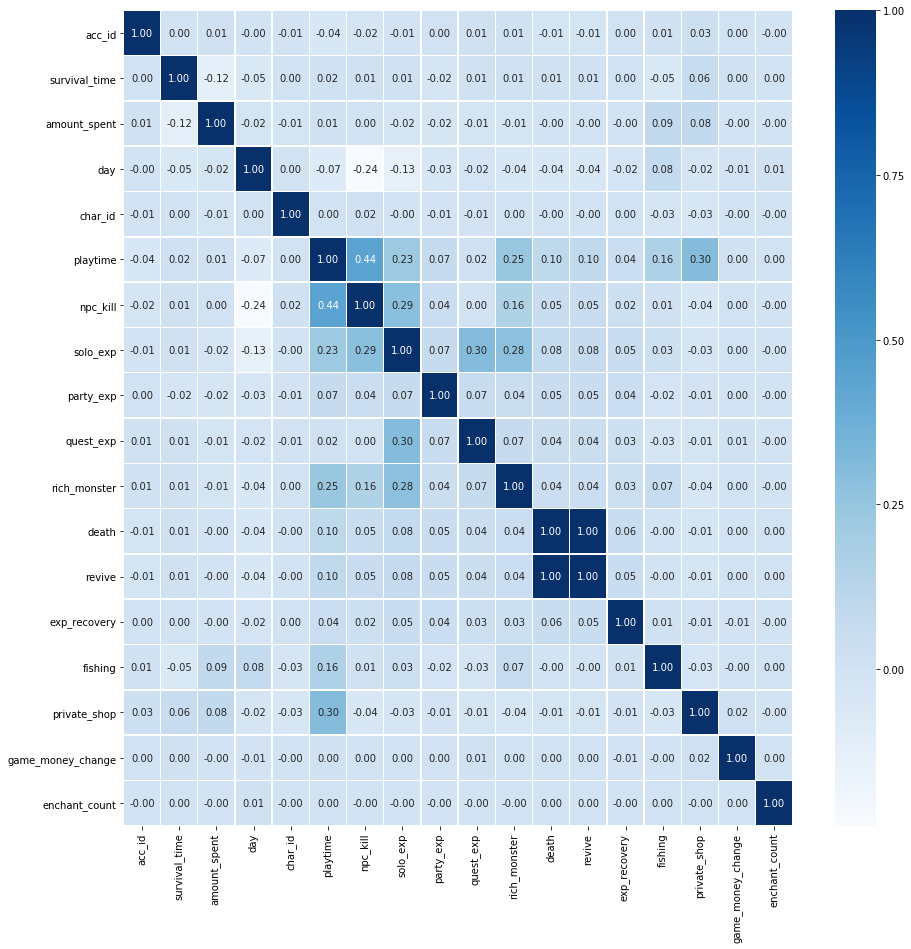

,acc_id,survival_time,amount_spent,day,char_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
count,24227.000000,24227.000000,24227.000000,24227.000000,24227.00000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000
mean,65487.284517,1.386346,1.149200,15.827465,198849.30433,0.478166,0.269125,0.445572,0.045767,0.210352,0.111322,0.053486,0.050413,0.058589,0.169028,0.032363,0.000076,0.017322
std,37127.709554,0.486921,3.611976,8.223466,115165.46571,0.801177,0.750619,1.619835,0.530807,1.465747,0.314537,0.438737,0.436162,1.038278,0.597237,0.278181,0.538646,1.143774
min,154.000000,1.000000,0.000000,1.000000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.250229,0.000000
25%,34302.000000,1.000000,0.000000,9.000000,99895.00000,0.007022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000204,0.000000
50%,66441.000000,1.000000,0.000000,16.000000,196235.00000,0.135758,0.000338,0.000537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,96985.000000,2.000000,0.748092,23.000000,301224.00000,0.505582,0.160522,0.110029,0.000000,0.003470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000343,0.000000
max,130468.000000,2.000000,39.412632,28.000000,397373.00000,3.370544,10.226743,54.884061,27.908790,18.842741,1.000000,20.408328,20.281626,47.846200,3.370544,3.370544,21.249945,146.880062


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns    
# %matplotlib inline   #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수

plt.figure(figsize=(15,15))
sns.heatmap(data = Abandoners_2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

Abandoners_2.describe()

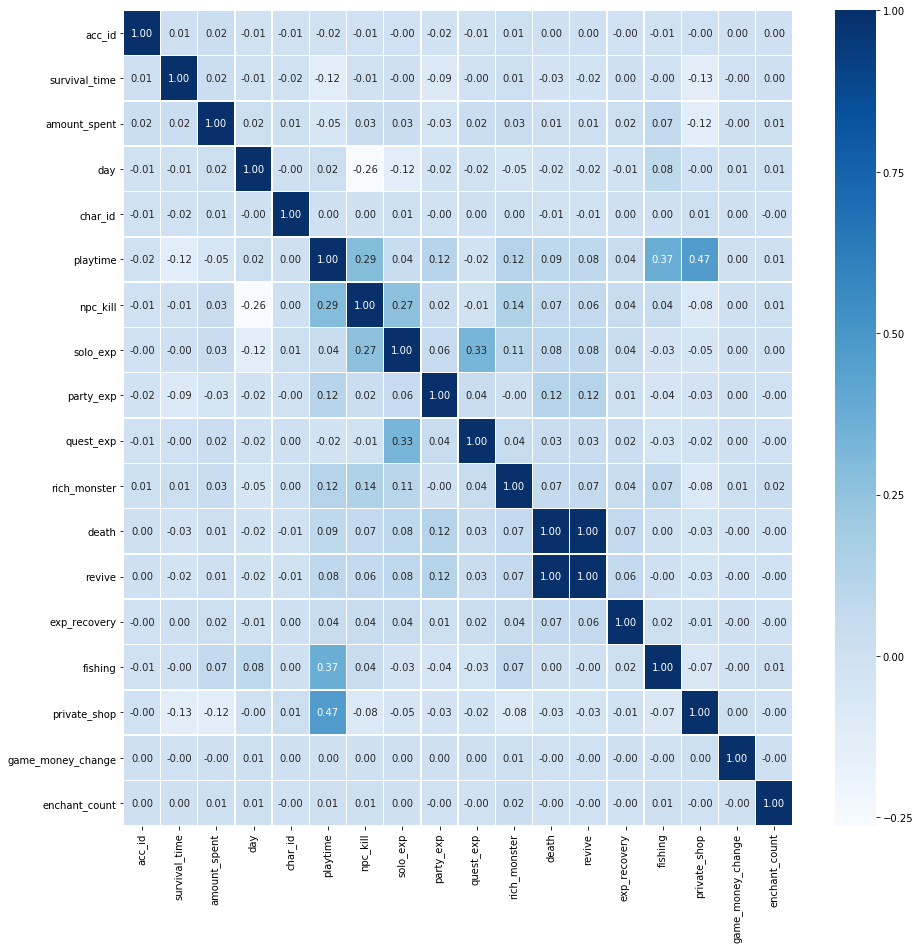

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(data = Abandoners_50.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

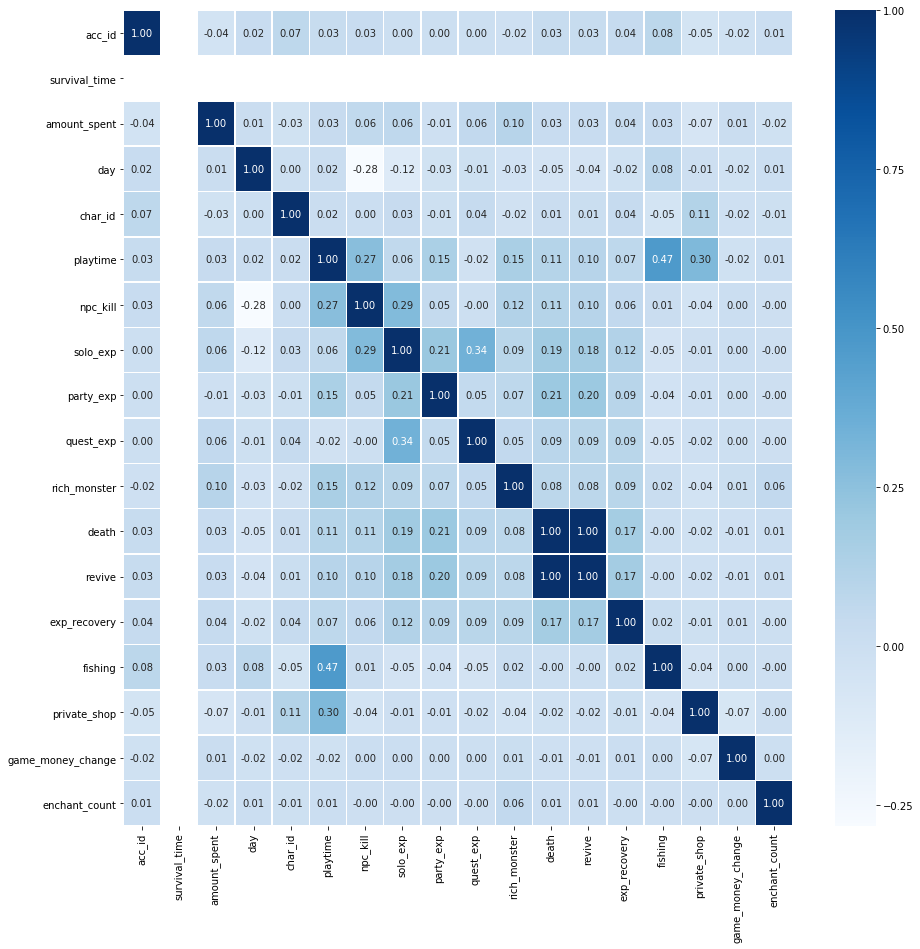

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(data = Abandoners_63.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = survived.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
survived.corr()

In [5]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.cross_validation import KFold 
from sklearn.grid_search import GridSearchCV 
iris = datasets.load_iris() 
X, y = iris.data, iris.target 
# 0.953 # X = iris_df.iloc[:, [0,1]] 
# 0.733 # X = iris_df.iloc[:, [2,3]] 
# 0.947 kf = KFold(len(y), n_folds=10) 
## KNN estimators = [('knn', KNeighborsClassifier())] 
parameters = {'knn__n_neighbors':(7,), 'knn__weights':('distance',)} 
pipeline = Pipeline(estimators) 
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=kf) 
grid_search.fit(X, y) 
print("Best score: %0.3f" % grid_search.best_score_)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

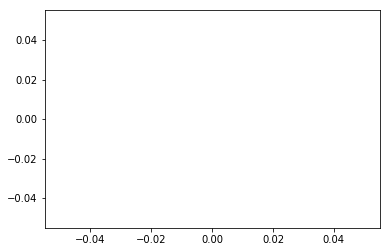

Index(['acc_id', 'survival_time', 'amount_spent'], dtype='object')

In [13]:
plt.plot(x=survived['acc_id'], y=survived['survival_time'])

plt.show()
survived.columns